In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data = pd.read_csv("hour.csv")
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data.shape

(17379, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
print(data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [6]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
correlation = data.corr()
print(correlation)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

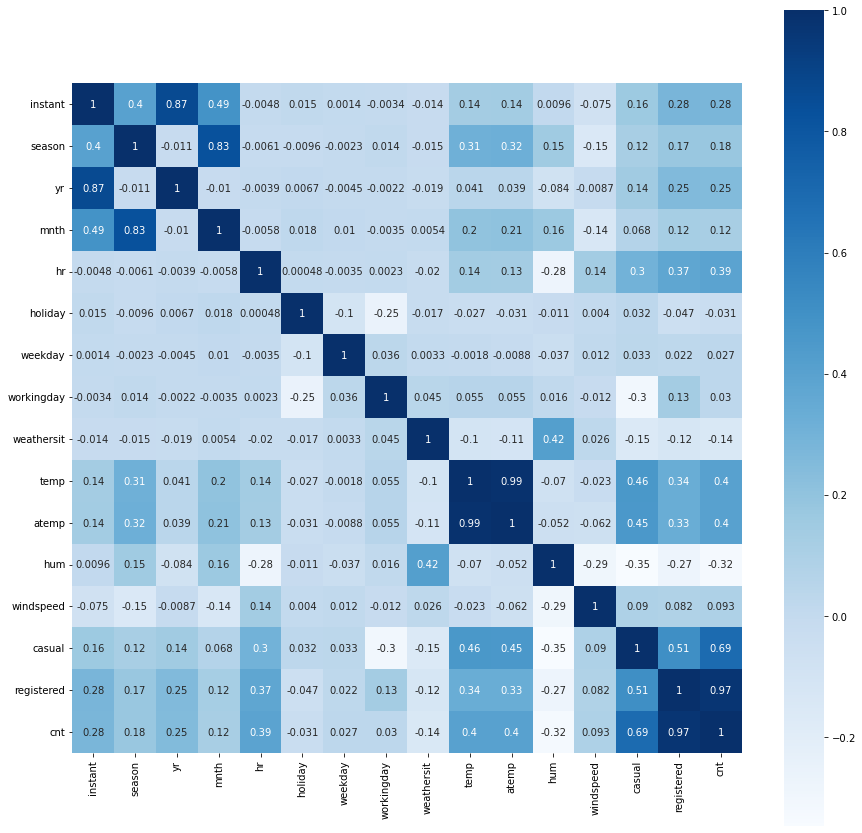

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cmap='Blues', annot=True, cbar=True, square=True, annot_kws={'size':10})
plt.show()

<AxesSubplot:xlabel='season', ylabel='count'>

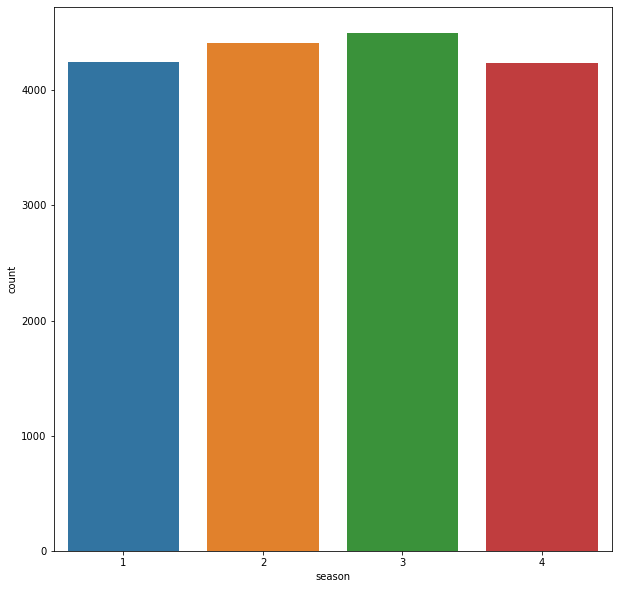

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(x='season', data=data)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

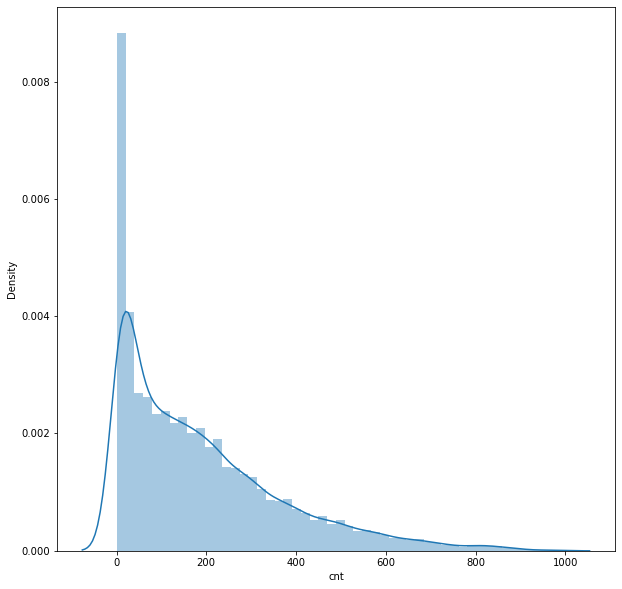

In [10]:
plt.figure(figsize=(10,10))
sns.distplot(data['cnt'])

<AxesSubplot:xlabel='hr', ylabel='cnt'>

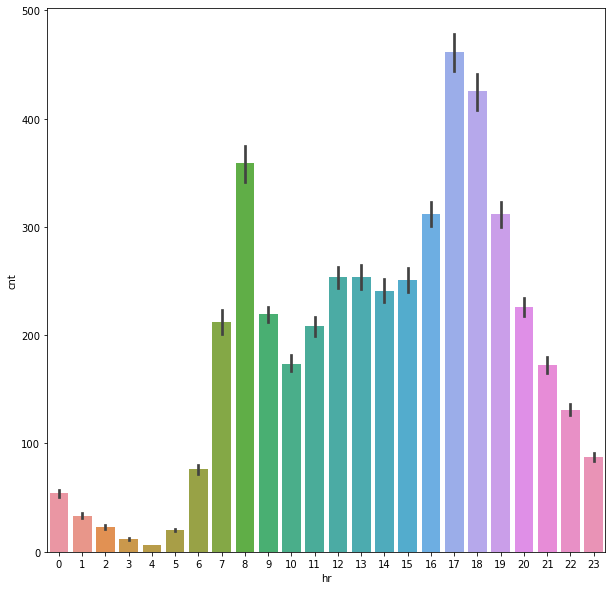

In [11]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, x='hr',y='cnt')

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

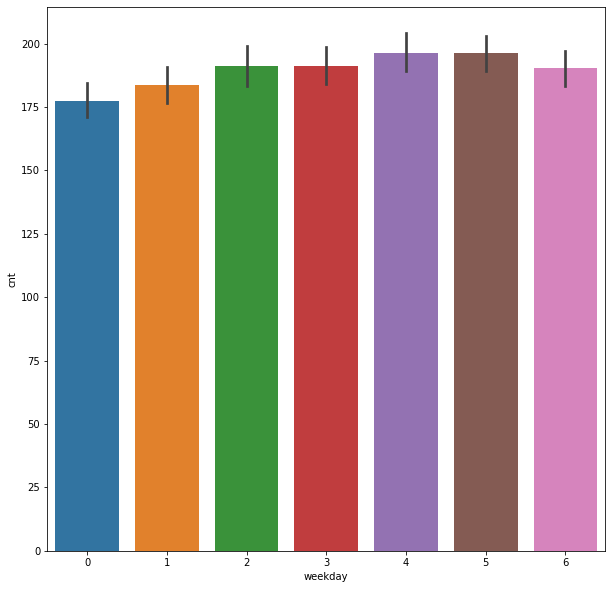

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, x='weekday',y='cnt')

In [13]:
# splitting the data into feature and target columns
x = data.drop(['cnt','dteday'], axis=1)
y = data['cnt']

In [15]:
# splitting the data into test ad train datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2, test_size=0.2)

In [18]:
# Training the model
model = LinearRegression()
model2 = RandomForestRegressor()

model.fit(x_train,y_train)
model2.fit(x_train,y_train)

In [21]:
model2.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
model.fit(x_train,y_train) 

LinearRegression()

In [23]:
# Model Evaluaion
predictionli = model.predict(x_train)
predictionrfr = model2.predict(x_train)

In [26]:
# Linear Regression
score = metrics.r2_score(predictionli, y_train)
mse = metrics.mean_squared_error(predictionli, y_train)
mae = metrics.mean_absolute_error(predictionli, y_train)
print("Linear Regression(Training data)")
print(f"R squared : {score}")
print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")

Linear Regression(Training data)
R squared : 1.0
Mean Squared Error : 7.697312582619112e-22
Mean Absolute Error : 2.4018885452410265e-11


In [27]:
# RandomForestRegression
score = metrics.r2_score(predictionrfr, y_train)
mse = metrics.mean_squared_error(predictionrfr, y_train)
mae = metrics.mean_absolute_error(predictionrfr, y_train)
print("RandomForestRegression(Training data)")
print(f"R squared : {score}")
print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")

RandomForestRegression(Training data)
R squared : 0.9999703293896738
Mean Squared Error : 0.9702662303100041
Mean Absolute Error : 0.37904193339567


In [28]:
prediction2li = model.predict(x_test)
prediction2rfr = model2.predict(x_test)

In [29]:
# Linear Regression
score = metrics.r2_score(prediction2li, y_test)
mse = metrics.mean_squared_error(prediction2li, y_test)
mae = metrics.mean_absolute_error(prediction2li, y_test)
print("Linear Regression(Test data)")
print(f"R squared : {score}")
print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")

Linear Regression(Test data)
R squared : 1.0
Mean Squared Error : 7.876960474930373e-22
Mean Absolute Error : 2.4444328481835727e-11


In [30]:
# RandomForestRegression
score = metrics.r2_score(prediction2rfr, y_test)
mse = metrics.mean_squared_error(prediction2rfr, y_test)
mae = metrics.mean_absolute_error(prediction2rfr, y_test)
print("RandomForestRegression(Test data)")
print(f"R squared : {score}")
print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")

RandomForestRegression(Test data)
R squared : 0.9996651864456533
Mean Squared Error : 11.129306214039119
Mean Absolute Error : 1.0027848101265822


In [35]:
print(f"{model.coef_}")

[ 5.52165263e-15 -8.88178420e-15  3.80834253e-13  1.94289029e-14
  1.74448130e-14  2.04255354e-14 -2.89292245e-15  1.97507077e-13
  7.87228355e-15 -2.23797651e-13  1.11005172e-13 -9.43557095e-15
  1.27799301e-13  1.00000000e+00  1.00000000e+00]


In [37]:
print(f"{model.intercept_}")

-4.8260062612826005e-11
